# User Churn Prediction

In this project, we use supervised learning models to identify customers in the telecom industry who are likely to stop using service in the future.    
Furthermore, we will analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration](#1 Data Exploration)
<li>[Part 2: Machine Learning Mastery](#2 Machine Learning Mastery)
<li>[Part 3: Feature Selection Using Random Forest](# 3 Feature Selection Using Random Forest)
<li>[Part 4: Findings, Verifications and Managerial Insights](# 4 Findings, Verifications and Managerial Insights)
</ul>

### 1 Data Exploration

### 1.1: Data set description

The data set is found first at
https://bigml.com/user/cesareconti89/gallery/dataset/58cfbada49c4a13341003cba   

Then later downloaded at 
http://dataminingconsultant.com/data/churn.txt

It's the same dataset for users in telecom industry

* state: user's state
* account length: Length of user's account
* area code: User's contact information - area code
* phone number: User's contact information - phone number
* international plan: whether user has international phone call plan
* voice mail plan: whether user has voice mail plan
* number vmail messages: how many voice messages user has
* total day minutes: how many minutes of total day calls made
* total day calls: how many day calls made
* total day charge: how much is the charge for day calls
* total eve minutes: how many minutes of evening calls made
* total eve calls: how many evening calls made
* total eve charge: how much is the charge for evening calls
* total night minutes: how many minutes of night calls made
* total night calls: how many night calls made
* total night charge: how much is the charge for night calls
* total intl minutes: how many minutes of international calls made
* total intl calls: how many international calls made
* total intl charge: how much is the charge for international calls made
* number customer service calls: phone call made to customer service

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

df = pd.read_csv('data/churn.all')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Inspect
df[:5]

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
# 5000 rows and 21 columns
df.shape

(5000, 21)

### 1.2 : Data cleaning

After initial attempt, we found out that values in 'voice_mail_plan','intl_plan','churned' has whitespace in front of the acutal words

In [4]:
df['voice_mail_plan'][0]

' yes'

Remove all whitespaces

In [5]:
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x: x.strip())
df['intl_plan'] = df['intl_plan'].map(lambda x: x.strip())
df['churned'] = df['churned'].map(lambda x: x.strip())

Drop some columns we consider useless

In [6]:
to_drop = ['account_length','state','area_code','phone_number']

In [7]:
df.drop(to_drop, axis=1,inplace=True)

Replace all 'yes' with True and all 'no' with False

In [8]:
df.replace('yes', True,inplace=True)

In [9]:
df.replace('no', False,inplace=True)

Values inside columns 'churned' values are string with a dot.  
We need to  remove it

In [10]:
df.loc[0,'churned']

'False.'

In [11]:
df.loc[10,'churned']

'True.'

In [12]:
df.replace('False.', False,inplace=True )

In [13]:
df.replace('True.', True,inplace=True )

# 2 Machine Learning Mastery

In [14]:
df[:5]

,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.1 Use Decision  Tree to spot any initial finding

In [15]:
X = df.drop('churned',axis=1)

In [16]:
Y = df.churned

In [17]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [18]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

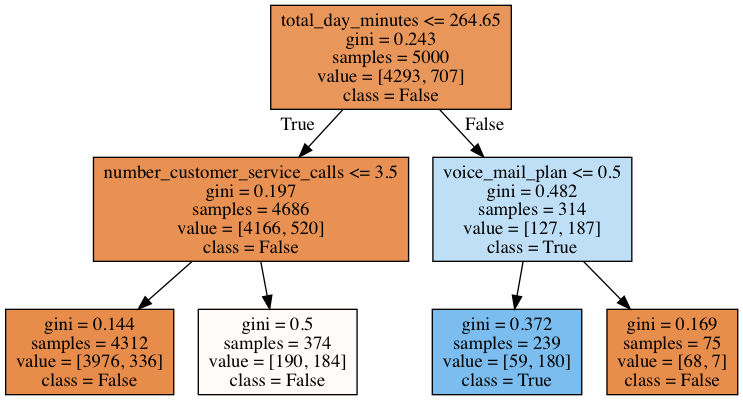

In [19]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Initial finding:
If user's total_day_minutes is longer than 264.65 minutes and he/she does not have voice mail plan, then this person is likely to churn

Verify it

In [20]:
df2 = df.copy()

In [21]:
df2['total_day_minutes<=264.65'] = df2.total_day_minutes <= 264.65

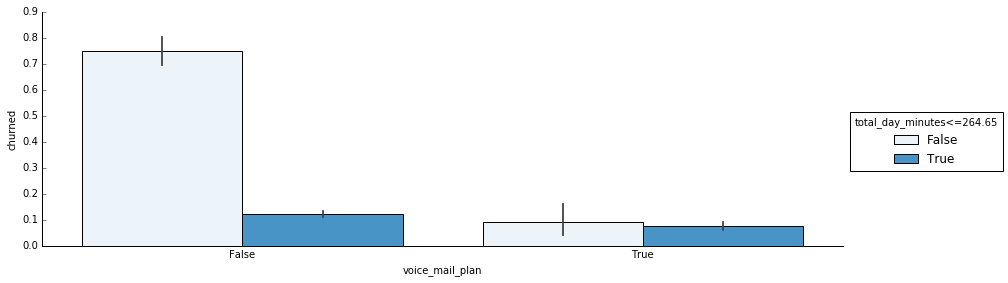

In [65]:
sns.factorplot(x='voice_mail_plan',y='churned',hue ='total_day_minutes<=264.65', data=df2,kind = 'bar',
              aspect =3,color ='#3498db')

We want to find out whether the above finding is effective, so we need to examine whether the above features are the most important features. But there are more than one model, we run three of them to choose one to do feature selection later.

### 2.1 Hold-out sample method with three Classifiers

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [24]:
# Normalize Data to improve performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

Build a method here print each classifier's  
Confusion Matrix   
Accuracy  rate   
Precision rate  
Recall rate    
AUC Score

In [26]:
def print_metrics(classifier):
    classifier.fit(X_train,Y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    cm = confusion_matrix(Y_test,y_pred)
    ac = met.accuracy_score(Y_test,y_pred)
    pc = met.precision_score(Y_test,y_pred)
    rc = met.recall_score(Y_test,y_pred)
    auc = met.roc_auc_score(Y_test,y_pred_proba)
    print ('Confusion Matrix is ')
    print  cm
    print ('Accuracy is ' + str(ac))
    print ('Precision is ' + str(pc))
    print ('Recall is ' + str(rc))
    print ('AUC score is ' + str(auc))

#### Using Random Forest Classifier

In [27]:
print_metrics(RandomForestClassifier())

Confusion Matrix is 
[[1291    7]
 [  48  154]]
Accuracy is 0.963333333333
Precision is 0.95652173913
Recall is 0.762376237624
AUC score is 0.919453386017


#### Using Logistic Regression Classifier

In [28]:
print_metrics(LogisticRegression())

Confusion Matrix is 
[[1263   35]
 [ 163   39]]
Accuracy is 0.868
Precision is 0.527027027027
Recall is 0.193069306931
AUC score is 0.820931669438


#### Using KNN Classifier

In [29]:
print_metrics(KNeighborsClassifier())

Confusion Matrix is 
[[1276   22]
 [ 129   73]]
Accuracy is 0.899333333333
Precision is 0.768421052632
Recall is 0.361386138614
AUC score is 0.839406398267


### 2.2 Cross Validation Method with three Classifiers

In [30]:
from sklearn.model_selection import KFold, cross_val_score

In [31]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)

In [32]:
def print_accuracy_precision_recall_AUC(cl):
    accuracy = cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='accuracy').mean()
    precision = cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='precision').mean()
    recall = cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='recall').mean()
    auc = cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print ('Accuracy is ' + str(accuracy))
    print ('Precision is ' + str(precision))
    print ('Recall is ' + str(recall))
    print ('AUC score is ' + str(auc))

**RandomForest** metrics:

In [33]:
print_accuracy_precision_recall_AUC(RandomForestClassifier(n_jobs=-1))

Accuracy is 0.955
Precision is 0.944898234321
Recall is 0.721626229845
AUC score is 0.915899706411


**LogisticRegression** metrics:

In [34]:
print_accuracy_precision_recall_AUC(LogisticRegression(n_jobs=-1))

Accuracy is 0.8638
Precision is 0.57492848232
Recall is 0.203066163786
AUC score is 0.8261547283


**KNN** metrics:

In [35]:
print_accuracy_precision_recall_AUC(KNeighborsClassifier())

Accuracy is 0.9038
Precision is 0.823860283865
Recall is 0.401239247688
AUC score is 0.85436696257


** Random Forest display the highest metrics, so we use it to do feature selcetion **

# 3 Feature Selection Using Random Forest

### 3.1:  Visualize the features

In [36]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import seaborn as sb

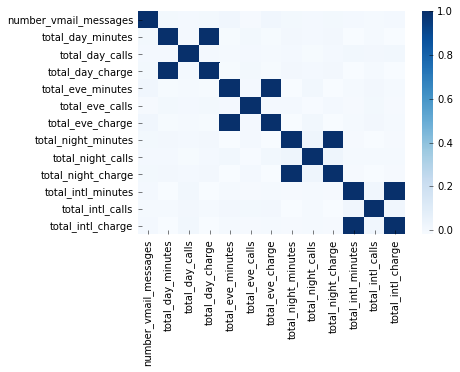

In [37]:
corr = df[["number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_night_charge","total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

sb.heatmap(corr, cmap="Blues")

We can see that (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge) are 100% corrlated

Verify it with numbers

In [38]:
df['day_call_rate'] = df.total_day_charge / df.total_day_minutes
df.day_call_rate[:5]
# Around 0.17

0    0.170011
1    0.169988
2    0.170008
3    0.170007
4    0.170006
Name: day_call_rate, dtype: float64

In [39]:
df['eve_call_rate'] = df.total_eve_charge / df.total_eve_minutes
df.eve_call_rate[:5]
# Around 0.085

0    0.085005
1    0.085013
2    0.084983
3    0.084976
4    0.085030
Name: eve_call_rate, dtype: float64

In [40]:
df['night_call_rate'] = df.total_night_charge / df.total_night_minutes
df.night_call_rate[:5]
# Around 0.045

0    0.044994
1    0.045008
2    0.045018
3    0.044997
4    0.044997
Name: night_call_rate, dtype: float64

### 3.2: Retrieve Feature Importance

In [41]:
forest = RandomForestClassifier()
forest.fit(X, Y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda value: round(value, 4), importances), df.columns), reverse=True):
    print '    '+ v + ": " + str(k)

Feature importance ranking by Random Forest Model:
    total_day_minutes: 0.1558
    total_day_charge: 0.128
    number_customer_service_calls: 0.1234
    intl_plan: 0.0834
    total_eve_charge: 0.0788
    total_intl_calls: 0.0624
    total_eve_minutes: 0.0608
    total_night_minutes: 0.0485
    total_intl_minutes: 0.0478
    total_night_charge: 0.0437
    number_vmail_messages: 0.0394
    total_intl_charge: 0.0328
    total_night_calls: 0.0285
    total_day_calls: 0.0245
    total_eve_calls: 0.0233
    voice_mail_plan: 0.0191


# 4 Findings, Verifications and Managerial Insights

** This ranking suggesting that feature 'voice_mail_plan' is the least important one, so we need to rerun the decision tree**

**Also, since minutes and charge are 100% corrlated, for decision tree analysis, we will only keep minutes because it has higher importantce than charge**

Take out the features that have highest importance and create a new data frame

In [42]:
columns = ['total_day_minutes','number_customer_service_calls',
           'total_intl_calls','intl_plan','total_eve_minutes',
           'total_intl_minutes','total_night_minutes','total_intl_minutes',
           'number_vmail_messages','total_day_calls']

In [43]:
df3 = df.loc[:,columns]

In [44]:
df3[:5]

,total_day_minutes,number_customer_service_calls,total_intl_calls,intl_plan,total_eve_minutes,total_intl_minutes,total_night_minutes,total_intl_minutes,number_vmail_messages,total_day_calls
0,265.1,1,3,False,197.4,10.0,244.7,10.0,25,110
1,161.6,1,3,False,195.5,13.7,254.4,13.7,26,123
2,243.4,0,5,False,121.2,12.2,162.6,12.2,0,114
3,299.4,2,7,True,61.9,6.6,196.9,6.6,0,71
4,166.7,3,3,True,148.3,10.1,186.9,10.1,0,113


In [45]:
X2 = df3

In [46]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [47]:
dt.fit(X2,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

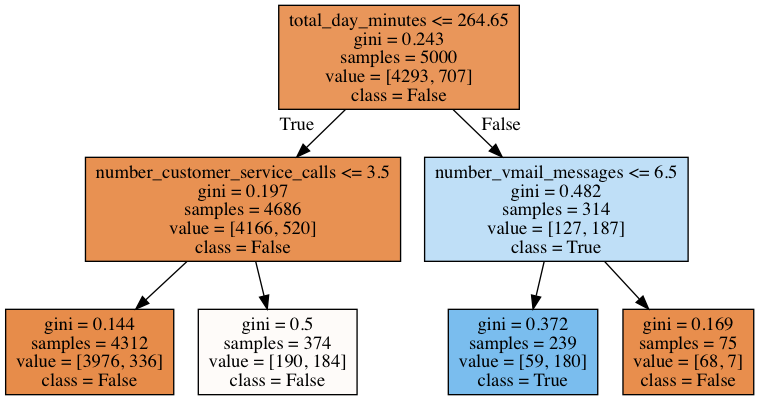

In [48]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X2.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**Finding 1**:   
If customers' number_vmail_messages is less than 6.5, this customer has a higher chance of churning. This is more true when the total_day_minutes is more than 264.55(which means total_day_charges is more than 44.99).

Verify it with seaborn and a table

In [49]:
df2['number_vmail_messages <= 6.5'] = df2.number_vmail_messages <= 6.5

In [50]:
df2['total_day_minutes<=264.65'] = df2.total_day_minutes <= 264.55

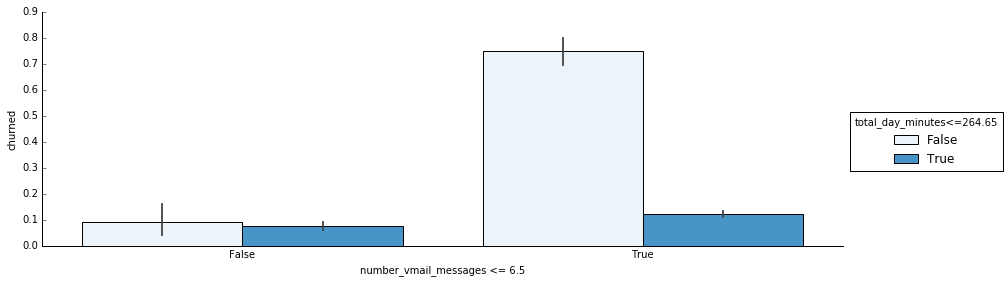

In [51]:
sns.factorplot(x='number_vmail_messages <= 6.5',y='churned',hue ='total_day_minutes<=264.65', data=df2,kind = 'bar',
              aspect =3,color ='#3498db')

In [52]:
df2.groupby(['total_day_minutes<=264.65','number_vmail_messages <= 6.5'])['churned'].mean().to_frame()

churned
total_day_minutes<=264.65 number_vmail_messages <= 6.5          
False                     False                         0.093333
                          True                          0.750000
True                      False                         0.076367
                          True                          0.123511

**Managerial insight for finding 1**:   
If this type of user has voice mail plan but only use less than 7 messages, then they are not happy with the plan.    
We could offer them a plan that if they only have less than 8 messages, the charges is some kind of discount. If they exceed 8, then we charge them full.

Experiment it with max_depth 3

In [53]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [54]:
dt.fit(X2,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

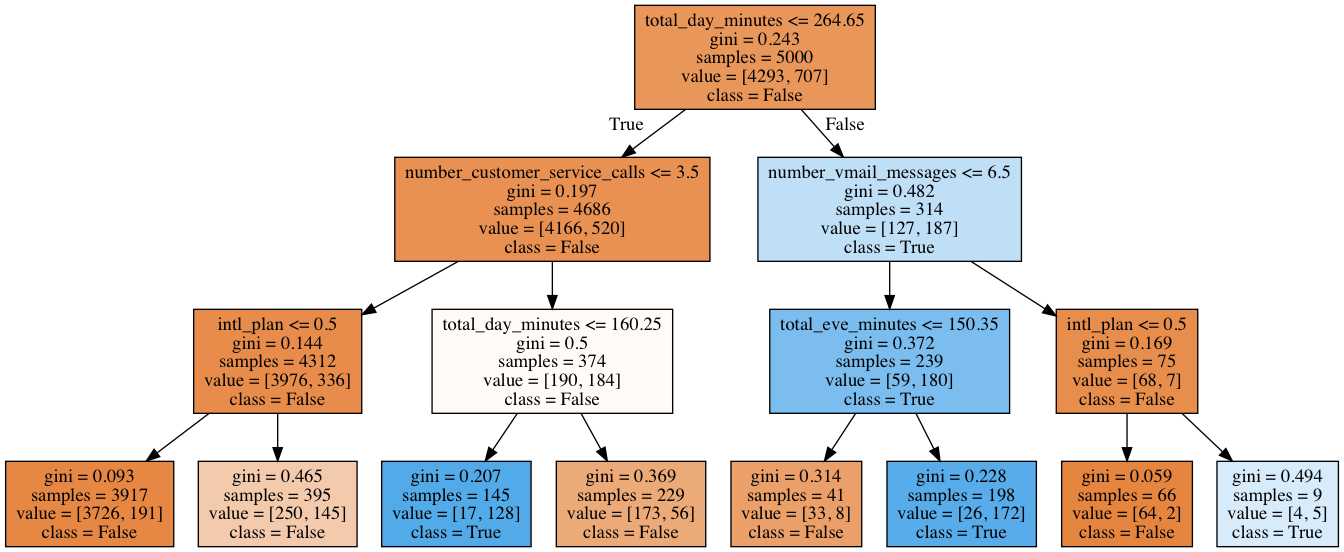

In [55]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X2.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**Finding 2**: If customers made more than 3-4 service phone calls (higher than average) and they made less than 162 total_day_minutes phone call (lower than average), then they are very likely to churn.

Verify it with seaborn and a table

In [56]:
df2['number_customer_service_calls <= 3.5'] = df2.number_customer_service_calls <= 3.5

In [57]:
df2['binned_total_day_minutes'] = pd.cut(df2.total_day_minutes, bins = [0,162,264], right = False)

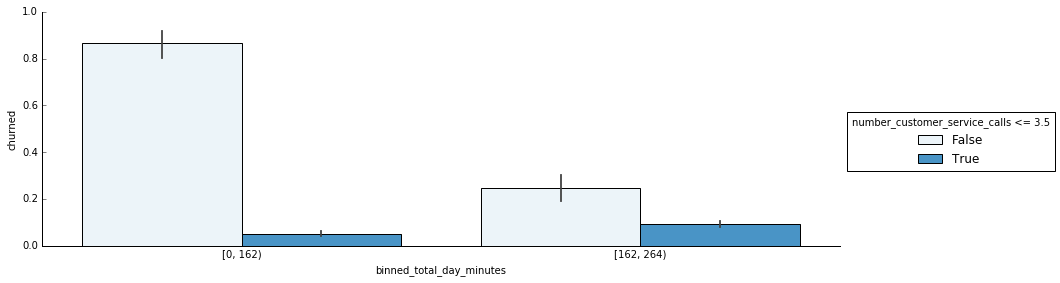

In [58]:
sns.factorplot(x='binned_total_day_minutes',y='churned', hue = 'number_customer_service_calls <= 3.5',data=df2,kind = 'bar',
              aspect =3, color ='#3498db')

In [59]:
df2.groupby(['number_customer_service_calls <= 3.5','binned_total_day_minutes'])['churned'].mean().to_frame()

churned
number_customer_service_calls <= 3.5 binned_total_day_minutes          
False                                [0, 162)                  0.864865
                                     [162, 264)                0.248889
True                                 [0, 162)                  0.052662
                                     [162, 264)                0.094063

We can see that if customer made more than 3-4 calls and he/she made less than 162 day minutes phone call, the probability of this person churning is fairly high,86%.   

** Managerial insight for finding 2:**     
160.25 total_day_minutes cost around $23 is relatively low in the whole dataset, the fact they made more service phone calls is worth noticing.   
We should tag these users out and when third severice call is made, alert the customer service to pay special attention and maybe offer phone bill credits to them to make up the bad experience of multiple service calls.

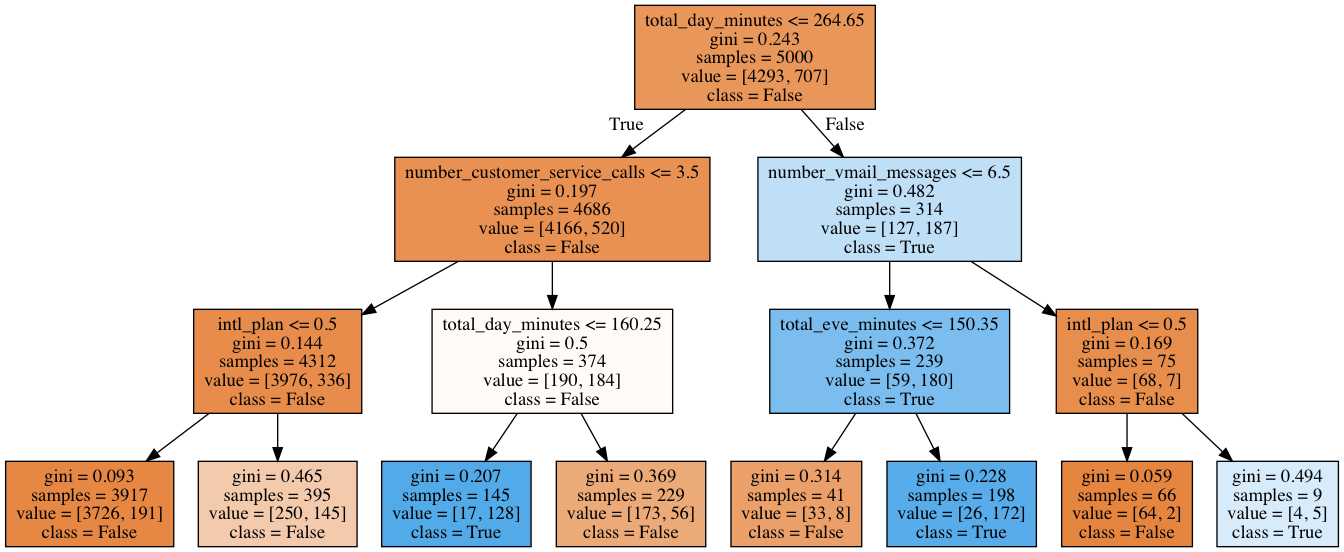

In [60]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X2.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**Finding 3**: customers are likely to churn if total_eve_minutes is more than 150.35(total_eve_charge is more than 6.7725). This is more true when their total_day_minutes are more than 264.65 (ortotal_day_charges are more than 51.425) and their number_vail_messages is less than 6.5

Verify it with seaborn and a table 

In [61]:
df2['number_vmail_messages <= 6.5'] = df2.number_vmail_messages <= 6.5

In [62]:
df2['binned_total_eve_minutes'] = pd.cut(df.total_eve_minutes, bins=[0,150,300],right = False)

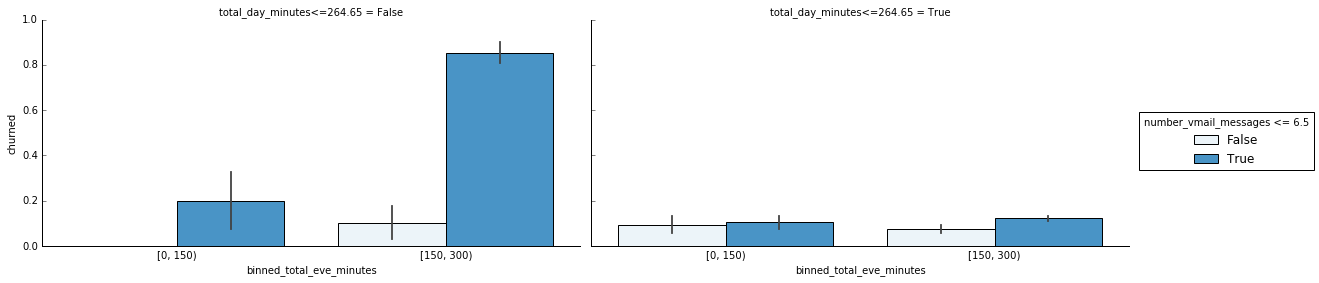

In [63]:
sns.factorplot(x='binned_total_eve_minutes',y='churned',col ='total_day_minutes<=264.65', hue = 'number_vmail_messages <= 6.5',data=df2,kind = 'bar',
              aspect =2, color ='#3498db')

In [64]:
df2.groupby(['total_day_minutes<=264.65','number_vmail_messages <= 6.5','binned_total_eve_minutes'])['churned'].mean().to_frame()

churned
total_day_minutes<=264.65 number_vmail_messages <= 6.5 binned_total_eve_minutes          
False                     False                        [0, 150)                  0.000000
                                                       [150, 300)                0.102941
                          True                         [0, 150)                  0.200000
                                                       [150, 300)                0.853403
True                      False                        [0, 150)                  0.092308
                                                       [150, 300)                0.073674
                          True                         [0, 150)                  0.103512
                                                       [150, 300)                0.122464

**Managerial insight for finding 3:**    
This type of user, not only they care about how did they use up their voice messages, they are not happy about the  evening charges either.     
We could look over competitor's rate and compute if we drop the rate to the same or even lower to see how much money we lose compare to the previous rate.    
Then compute how money we make if we retain these customer using the lowered rate.    
Compare the two numbers to decide.